# Visualization Ideas Based on Exp40 & Exp41

### Preprocessing Exp41

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def gather_exp41(folder_path):
    exp41_data_path = [folder_path + '/csv_results_41_255439_mp-01-naamsestraat-35-maxim.csv',
                       folder_path + '/csv_results_41_255440_mp-02-naamsestraat-57-xior.csv',
                       folder_path + '/csv_results_41_255441_mp-03-naamsestraat-62-taste.csv',
                       folder_path + '/csv_results_41_255442_mp-05-calvariekapel-ku-leuven.csv',
                       folder_path + '/csv_results_41_255443_mp-06-parkstraat-2-la-filosovia.csv',
                       folder_path + '/csv_results_41_255444_mp-07-naamsestraat-81.csv',
                       folder_path + '/csv_results_41_255445_mp-08-kiosk-stadspark.csv',
                       folder_path + '/csv_results_41_280324_mp08bis---vrijthof.csv',
                       folder_path + '/csv_results_41_303910_mp-04-his-hears.csv']
    exp41_data = []
    
    for i in exp41_data_path:
        exp41_data.append(pd.read_csv(i, sep = ';'))
    return exp41_data


def divide_timestamp(df):
    df_final = df.copy()
    df_final['result_timestamp'] = df.result_timestamp.str[:19]
    df_final['year'] = df.result_timestamp.str[6:10].astype('int32')
    df_final['month'] = df.result_timestamp.str[3:5].astype('int32')
    df_final['day'] = df.result_timestamp.str[0:2].astype('int32')
    df_final['hour'] = df.result_timestamp.str[11:13].astype('int32')
    df_final['minute'] = df.result_timestamp.str[14:16].astype('int32')
    df_final['second'] = df.result_timestamp.str[17:19].astype('int32')
    return df_final


def drop_modify_exp41(df, first=True):
    final = []
    description_mapping = {
        'MP 01: Naamsestraat 35  Maxim': 'Naamsestraat 35',
        'MP 02: Naamsestraat 57 Xior': 'Naamsestraat 57',
        'MP 03: Naamsestraat 62 Taste': 'Naamsestraat 62',
        'MP 05: Calvariekapel KU Leuven': 'Calvariekapel KU Leuven',
        'MP 06: Parkstraat 2 La Filosovia': 'Parkstraat 2',
        'MP 07: Naamsestraat 81': 'Naamsestraat 81',
        'MP08bis - Vrijthof': 'Vrijthof'
    }
    
    for data in df:
        data_nan = data.dropna(subset=['noise_event_laeq_primary_detected_certainty'])
        data_nan_drop = data_nan.drop(['noise_event_laeq_model_id_unit', 'noise_event_laeq_primary_detected_certainty_unit', 'noise_event_laeq_primary_detected_class_unit'], axis=1)
        data_nan_drop_uncertain75 = data_nan_drop[data_nan_drop['noise_event_laeq_primary_detected_certainty'] > 75]
        data_final = divide_timestamp(data_nan_drop_uncertain75)
        data_final['description'] = data_final['description'].replace(description_mapping)
        
        if first:
            le = LabelEncoder()
            data_final['noise_event_class'] = le.fit_transform(data_final['noise_event_laeq_primary_detected_class'])
            first = False
        else:
            data_final['noise_event_class'] = le.transform(data_final['noise_event_laeq_primary_detected_class'])
        
        final.append(data_final)
    
    return final

def initial_preprocessing_exp41(folder_path, first = True):
    exp41_data = gather_exp41(folder_path)
    exp41_final = drop_modify_exp41(exp41_data)
    return exp41_final

In [97]:
[df1_E, df2_E, df3_E, df4_E, df5_E, df6_E, df7_E, df8_E, df9_E] = initial_preprocessing_exp41("C:/Users/fieuw/Desktop/export_41", first=True)
df1 = pd.concat([df1_E,df2_E,df3_E,df4_E,df5_E,df6_E,df7_E,df8_E,df9_E], ignore_index=True)

### Preprocessing Exp40

In [98]:
def gather_exp40(folder_path):
    exp40_data_path = [folder_path + '/csv_results_40_255439_mp-01-naamsestraat-35-maxim.csv',
                       folder_path + '/csv_results_40_255440_mp-02-naamsestraat-57-xior.csv',
                       folder_path + '/csv_results_40_255441_mp-03-naamsestraat-62-taste.csv',
                       folder_path + '/csv_results_40_255442_mp-05-calvariekapel-ku-leuven.csv',
                       folder_path + '/csv_results_40_255443_mp-06-parkstraat-2-la-filosovia.csv',
                       folder_path + '/csv_results_40_255444_mp-07-naamsestraat-81.csv',
                       folder_path + '/csv_results_40_255445_mp-08-kiosk-stadspark.csv',
                       folder_path + '/csv_results_40_280324_mp08bis---vrijthof.csv',
                       folder_path + '/csv_results_40_303910_mp-04-his-hears.csv']
    exp40_data = []
    
    for i in exp40_data_path:
        exp40_data.append(pd.read_csv(i, sep = ';'))
    return exp40_data

def divide_timestamp(df):
    df_final = df.copy()
    df_final['result_timestamp'] = df_final['result_timestamp'].str[:19]
    df_final['year'] = df_final['result_timestamp'].str[6:10].astype('int32')
    df_final['month'] = df_final['result_timestamp'].str[3:5].astype('int32')
    df_final['day'] = df_final['result_timestamp'].str[0:2].astype('int32')
    df_final['hour'] = df_final['result_timestamp'].str[11:13].astype('int32')
    df_final['day_month'] = df_final['day'].astype(str) + '/' + df_final['month'].astype(str)
    return df_final


def drop_modify_exp40(df, first=True):
    final = []
    description_mapping = {
        'MP 01: Naamsestraat 35  Maxim': 'Naamsestraat 35',
        'MP 02: Naamsestraat 57 Xior': 'Naamsestraat 57',
        'MP 03: Naamsestraat 62 Taste': 'Naamsestraat 62',
        'MP 04: His & Hears': 'His & Hears',
        'MP 05: Calvariekapel KU Leuven': 'Calvariekapel KU Leuven',
        'MP 06: Parkstraat 2 La Filosovia': 'Parkstraat 2',
        'MP 07: Naamsestraat 81': 'Naamsestraat 81',
        'MP08bis - Vrijthof': 'Vrijthof'
       
    }
    
    for data in df:
        datadrop = data.drop(["laf005_per_hour_unit", "laf01_per_hour_unit", "laf05_per_hour_unit", "laf10_per_hour_unit",
                   "laf25_per_hour_unit", "laf50_per_hour_unit", "laf75_per_hour_unit", "laf90_per_hour_unit",
                   "laf95_per_hour_unit", "laf98_per_hour_unit", "laf99_per_hour_unit", "laf995_per_hour_unit"],
                  axis=1).copy()
        data_final = divide_timestamp(datadrop)
        data_final['description'] = data_final['description'].replace(description_mapping)
        final.append(data_final)
    return final



def initial_preprocessing_exp40(folder_path, first = True):
    exp40_data = gather_exp40(folder_path)
    exp40_final = drop_modify_exp40(exp40_data)
    return exp40_final

In [99]:
[df1_N, df2_N, df3_N, df4_N, df5_N, df6_N, df7_N, df8_N, df9_N] = initial_preprocessing_exp40("C:/Users/fieuw/Desktop/export_40", first=True)
df2 = pd.concat([df1_N, df2_N, df3_N, df4_N, df5_N, df6_N, df7_N, df8_N, df9_N], ignore_index=True)

### Visuals for Exp41

We can make line charts that displays the counts of a specific event over time for different streets in which we aggregate over:
-  The hour 
-  The day
-  The week- versus weekenddays etc. 

This shows which events are most present during which times in the different locations.  
Ideally, in the dashboard we make it interactive with a drop-down menu, so that we can select the specific type of event we want to inspect. 

In [100]:
import plotly.express as px
df1['result_timestamp'] = pd.to_datetime(df1['result_timestamp'])
df1['day_of_week'] = df1['result_timestamp'].dt.strftime("%A")

class NoiseGraphGenerator:
    def __init__(self, data_frames):
        self.data_frames = data_frames
    
    def generate_graph(self, noise_class):
        concatenated_data = pd.concat(self.data_frames, ignore_index=True)
        shouting_data = concatenated_data[concatenated_data['noise_event_laeq_primary_detected_class'] == noise_class]
        grouped_data = shouting_data.groupby(['noise_event_laeq_primary_detected_class', 'description', 'hour']).size().reset_index(name='count')
        
        fig = px.line(grouped_data, x='hour', y='count', color='description', title=f'Average counts of {noise_class} per hour')
        fig.update_layout(
            xaxis_title='Hour',
            yaxis_title='Count',
            legend_title='Description',
            template='plotly_white'
        )
        
        return fig

data_frames = [df1_E, df2_E, df3_E, df4_E, df5_E, df6_E, df7_E, df8_E, df9_E]

noise_classes = [
    'Transport road - Siren',
    'Transport road - Passenger car',
    'Human voice - Shouting',
    'Human voice - Singing',
    'Music non-amplified',
    'Nature elements - Wind'
]

generator = NoiseGraphGenerator(data_frames)
for noise_class in noise_classes:
    graph = generator.generate_graph(noise_class)
    graph.show()



### Visuals for Exp40

We first try to get a general understanding of the evolution in noise levels in different locations
For this we use the 50th percentile or median value. 

We particularly would like to know which hours, weeks or months are the busiest, an whether there is a difference between weekdays and weekenddays. 

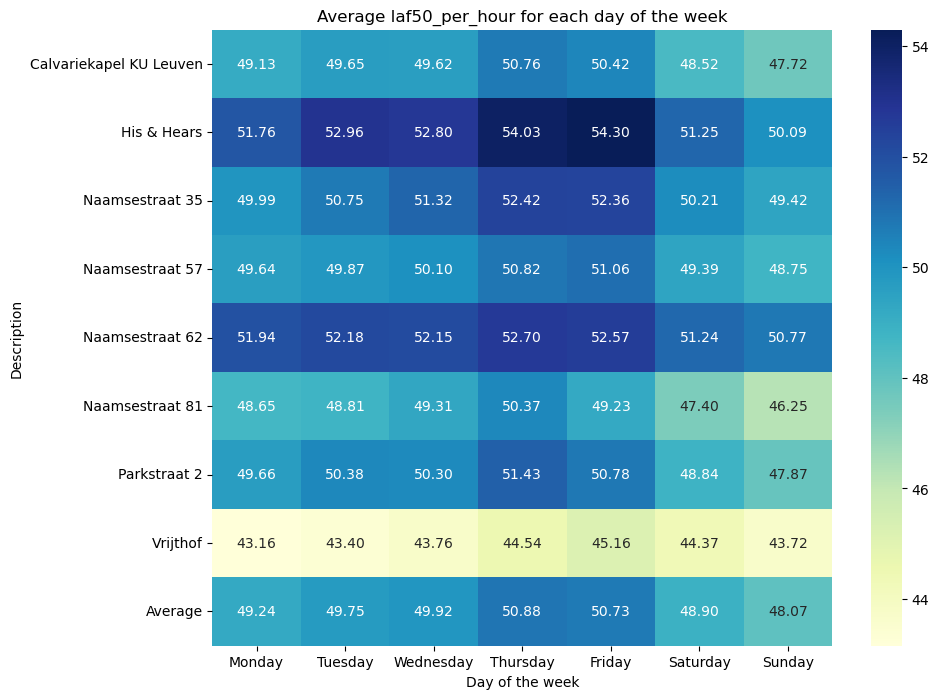

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df2['result_timestamp'] = pd.to_datetime(df2['result_timestamp'])
df2['day_of_week'] = df2['result_timestamp'].dt.strftime("%A")

df_avg = df2.groupby(['day_of_week', 'description'])['laf50_per_hour'].mean().reset_index()
df_heatmap = df_avg.pivot('description', 'day_of_week', 'laf50_per_hour')
average_across_descriptions = df_avg.groupby('day_of_week')['laf50_per_hour'].mean()
df_heatmap.loc['Average'] = average_across_descriptions
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_heatmap = df_heatmap.reindex(columns=order)

plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap='YlGnBu')

plt.xlabel('Day of the week')
plt.ylabel('Description')
plt.title('Average laf50_per_hour for each day of the week')

plt.show()


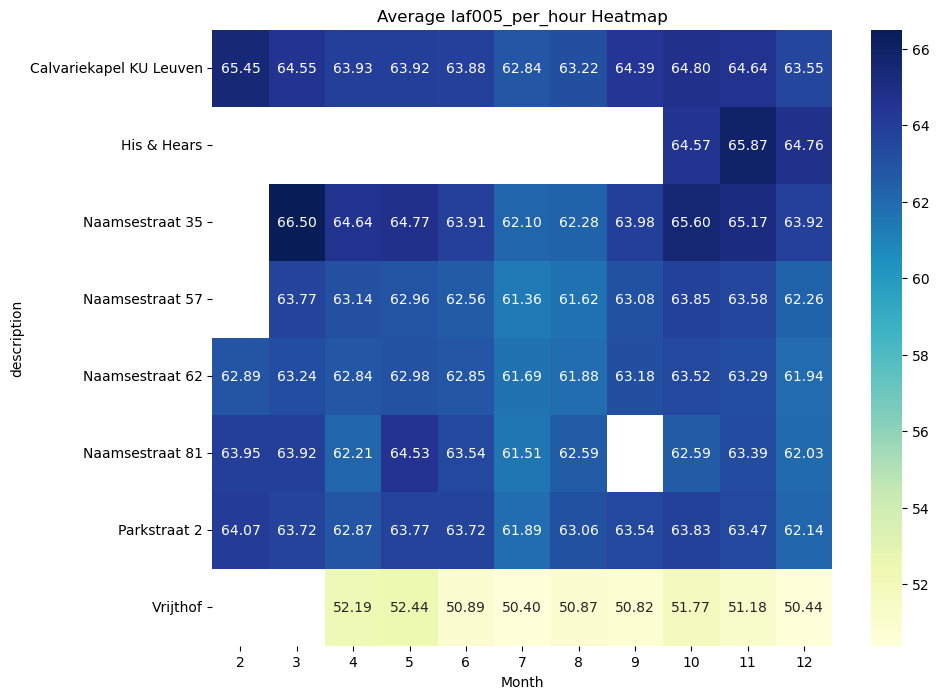

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt


df_heatmap = df2.groupby(['month', 'description'])['laf05_per_hour'].mean().reset_index()


df_heatmap = df_heatmap.pivot('description', 'month', 'laf05_per_hour')


plt.figure(figsize=(10, 8))  
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap='YlGnBu')


plt.xlabel('Month')
plt.ylabel('description')
plt.title('Average laf005_per_hour Heatmap')


plt.show()


In [103]:
import plotly.express as px

hourly_avg_desc = df2.groupby(['hour', 'description'])['laf50_per_hour'].mean().reset_index()

fig = px.line(hourly_avg_desc, x='hour', y='laf50_per_hour', color='description')
fig.update_layout(
    title='averaged median Noise Levels per Hour by Description',
    xaxis_title='Time of Day',
    yaxis_title='Average Noise Level'
)
fig.show()


In [104]:
import plotly.express as px

hourly_avg_desc = df2.groupby(['hour', 'description'])['laf005_per_hour'].mean().reset_index()

fig = px.line(hourly_avg_desc, x='hour', y='laf005_per_hour', color='description')
fig.update_layout(
    title='averaged extreme Noise Levels per Hour by Description',
    xaxis_title='Time of Day',
    yaxis_title='Average Noise Level'
)
fig.show()

### Visuals that combine Exp40 & Exp41

we merge the dataframes _N with _E on description, month, day and hour 

In [105]:
merged = df1.merge(df2, on=['#object_id', 'description', 'year', 'month', 'day', 'hour'], how='inner')

### Heat map 

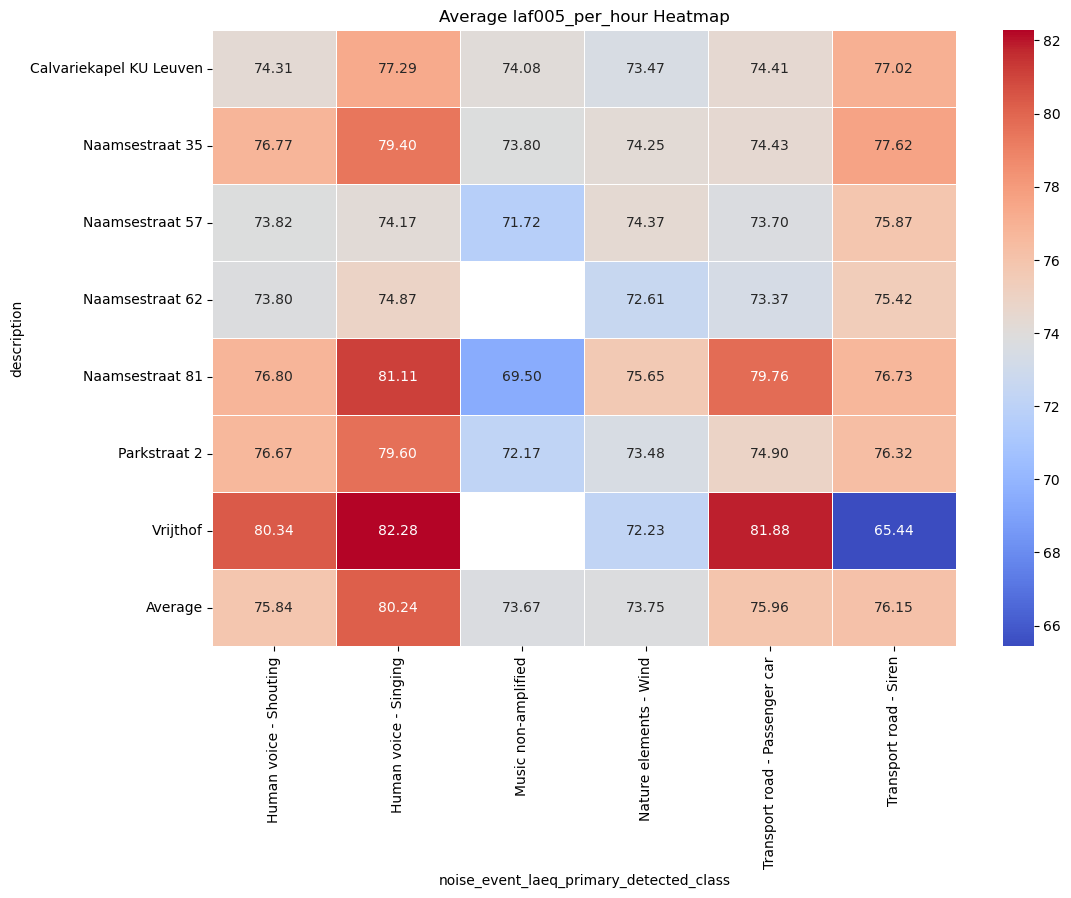

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class HeatmapVisualizer:
    def __init__(self, merged_dataframe):
        self.merged_dataframe = merged_dataframe
        self.heatmap_data = None

    def calculate_heatmap_data(self):
        self.heatmap_data = self.merged_dataframe.pivot_table(
            index='description',
            columns='noise_event_laeq_primary_detected_class',
            values='laf005_per_hour',
            aggfunc='mean'
        )

        average_by_class = self.merged_dataframe.groupby('noise_event_laeq_primary_detected_class')['laf005_per_hour'].mean()
        self.heatmap_data.loc['Average'] = average_by_class

    def plot_heatmap(self):
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
        plt.title('Average laf005_per_hour Heatmap')
        plt.xlabel('noise_event_laeq_primary_detected_class')
        plt.ylabel('description')
        plt.show()

merged_dataframe = merged  

heatmap_visualizer = HeatmapVisualizer(merged_dataframe)
heatmap_visualizer.calculate_heatmap_data()
heatmap_visualizer.plot_heatmap()



In general, singing seems to occur during hours that have detected louder noise levels 
Still we can not say that these events are the causes of these outlying noise values. 

### Boxplot noise values for different events 

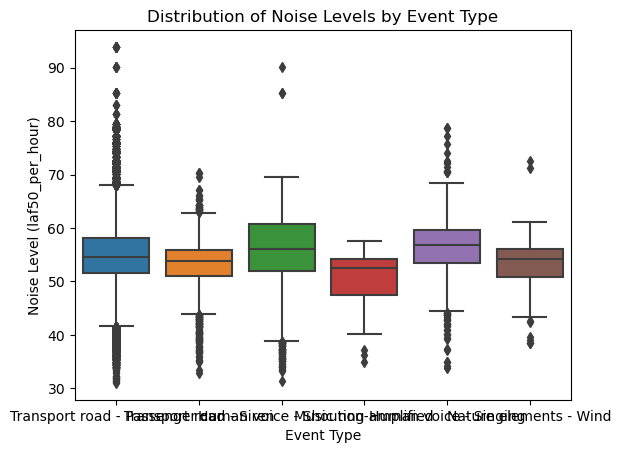

In [107]:
import seaborn as sns

sns.boxplot(data=merged, x='noise_event_laeq_primary_detected_class', y='laf50_per_hour')
plt.xlabel('Event Type')
plt.ylabel('Noise Level (laf50_per_hour)')
plt.title('Distribution of Noise Levels by Event Type')
plt.show()

### Map 

In [108]:
# Define the latitude and longitude values for each description
location_data = {
    'Naamsestraat 35': (50.877110, 4.700840),
    'Naamsestraat 57': (50.876490, 4.700700),
    'Naamsestraat 62': (50.875809, 4.700110),
    'Calvariekapel KU Leuven': (50.8745267, 4.6999168),
    'Parkstraat 2': (50.8741177, 4.7000138),
    'Naamsestraat 81': (50.8738250, 4.7001178),
    'Vrijthof': (50.8790375, 4.7011731)
}

merged['latitude'] = merged['description'].map(lambda x: location_data[x][0])
merged['longitude'] = merged['description'].map(lambda x: location_data[x][1])


In [109]:
import plotly.graph_objects as go
import pandas as pd


filtered_df = merged[['latitude', 'longitude', 'description', 'noise_event_laeq_primary_detected_class']]

grouped_df = filtered_df.groupby(['latitude', 'longitude', 'description']).agg({'noise_event_laeq_primary_detected_class': 'count'}).reset_index()

fig = go.Figure()

for index, row in grouped_df.iterrows():
    lat, lon, desc, count = row['latitude'], row['longitude'], row['description'], row['noise_event_laeq_primary_detected_class']
    
    tooltip = f"<b>Description:</b> {desc}<br>" \
              f"<b>Count:</b> {count}"
    
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=dict(size=10),
        hovertext=tooltip,
        hoverinfo='text',
        name=desc
    ))


fig.update_layout(
    mapbox_style="carto-positron",  # Black and white map style
    mapbox_center={"lat": filtered_df['latitude'].mean(), "lon": filtered_df['longitude'].mean()},
    mapbox_zoom=14,
    legend_title_text='Adress'  # Set the legend title
)


fig.show()


might be a nice idea to implement in the app such that when you press a point you get onto a seperate page for that specific location in which some other graphs about distribution is presented - maybe also such that people can adjust the time stamp - interactive charts and graphs (trends over time), heatmaps,...

distributions 

In [110]:

import plotly.graph_objects as go
import pandas as pd

# Filter the dataset to get the relevant columns
filtered_df = merged[['noise_event_laeq_primary_detected_class', 'laf50_per_hour']]

# Group the data by 'noise_event_laeq_primary_detected_class'
grouped_df = filtered_df.groupby('noise_event_laeq_primary_detected_class')

# Create a list to store histogram traces
histogram_traces = []

# Generate histogram trace for each noise event type
for noise_event_type, group_data in grouped_df:
    counts = group_data['laf50_per_hour'].value_counts()
    total_count = counts.sum()
    relative_counts = counts / total_count
    
    histogram_trace = go.Histogram(
        x=group_data['laf50_per_hour'],
        opacity=0.7,
        name=noise_event_type,
        histnorm='percent',
        autobinx=False,
        xbins=dict(start=group_data['laf50_per_hour'].min(), end=group_data['laf50_per_hour'].max(), size=1)
    )
    histogram_traces.append(histogram_trace)

# Create the layout for the histogram
layout = go.Layout(
    title='Histogram of laf50_per_hour by Noise Event Type',
    xaxis=dict(title='laf50_per_hour'),
    yaxis=dict(title='Relative Count (%)'),
    barmode='overlay',
    bargap=0.1
)

# Create the figure and plot the histogram traces
fig = go.Figure(data=histogram_traces, layout=layout)

# Display the histogram
fig.show()


In [111]:
import pandas as pd
import plotly.graph_objects as go

# Filter the data for 'Naamsestraat 35' and create a new DataFrame
filtered_df = df2[df2['description'] == 'Naamsestraat 35'].copy()

# Convert 'result_timestamp' column to datetime data type
filtered_df['result_timestamp'] = pd.to_datetime(filtered_df['result_timestamp'])

# Set 'result_timestamp' as the index
filtered_df.set_index('result_timestamp', inplace=True)

# Sort the DataFrame by 'result_timestamp'
filtered_df.sort_index(inplace=True)

# Extract the hourly laf50 values
hourly_laf50 = filtered_df['laf50_per_hour']

# Calculate daily and monthly averages
daily_avg = filtered_df.resample('D').mean()['laf50_per_hour']
monthly_avg = filtered_df.resample('M').mean()['laf50_per_hour']

# Create a trace for hourly laf50 values
trace_hourly = go.Scatter(
    x=hourly_laf50.index,
    y=hourly_laf50,
    mode='lines',
    name='Hourly Average'
)

# Create a trace for daily average values
trace_daily = go.Scatter(
    x=daily_avg.index,
    y=daily_avg,
    mode='lines',
    name='Daily Average'
)

# Create a trace for monthly average values
trace_monthly = go.Scatter(
    x=monthly_avg.index,
    y=monthly_avg,
    mode='lines',
    name='Monthly Average'
)

# Create a trace for weekly data points
trace_weekly = go.Scatter(
    x=hourly_laf50.resample('W').mean().index,
    y=hourly_laf50.resample('W').mean(),
    mode='markers',
    name='Weekly Data Points',
    marker=dict(
        symbol='circle',
        size=6,
        color='red'
    )
)

# Create a trace for daily data points
trace_daily_points = go.Scatter(
    x=hourly_laf50.resample('D').mean().index,
    y=hourly_laf50.resample('D').mean(),
    mode='markers',
    name='Daily Data Points',
    marker=dict(
        symbol='circle',
        size=4,
        color='black'
    )
)

# Create the plot layout
layout = go.Layout(
    title='Time Series of laf50_per_hour - Naamsestraat 35',
    xaxis=dict(title='Time'),
    yaxis=dict(title='laf50_per_hour'),
    showlegend=True
)

# Create the figure and add the traces
fig = go.Figure(data=[trace_hourly, trace_daily, trace_monthly, trace_weekly, trace_daily_points], layout=layout)

# Display the plot
fig.show()




an idea: pressing these outlying values and showcasing events detected that day, fb events that took place etc...! 

code is not yet okay - want a time series plot that highlights outlying noise days! so that I can link it with fb data! these are the plots that could be linked to the map



In [112]:
!pip install plotly --upgrade